In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris (1).csv


In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df = df.drop('Id',axis=1)


In [ ]:
#Species Label Encoding

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [ ]:
df['Species'] = le.fit_transform(df['Species'])

In [ ]:
df1 = df.copy()

In [ ]:
x = df1.iloc[:,0:4]

In [ ]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = df1.iloc[:,-1]

In [ ]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=334)

In [ ]:
x_train.shape

(105, 4)

In [ ]:

x_test.shape

(45, 4)

In [ ]:
y_train.shape

(105,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model1 = KNeighborsClassifier()

In [ ]:
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predict = model1.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
cm1 = confusion_matrix(y_test, y_predict)

In [ ]:
cm1

array([[14,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 17]])

In [ ]:
import seaborn as sns

<Axes: >

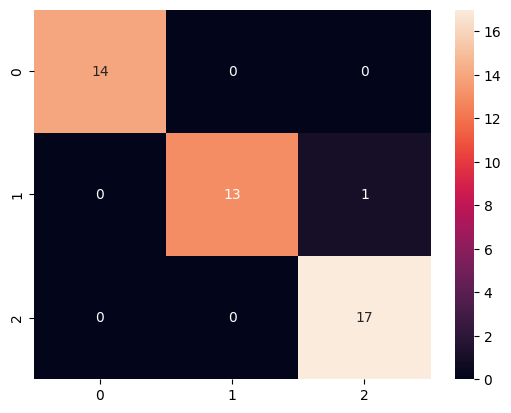

In [ ]:
sns.heatmap(cm1,annot=True)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
from sklearn.svm import SVC

In [ ]:
model2 = SVC()

In [ ]:
model2.fit(x_train, y_train)

SVC()

In [ ]:
y_predict1 = model2.predict(x_test)

In [ ]:
cm2 = confusion_matrix(y_test, y_predict1)


In [ ]:
cm2

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 16]])

In [ ]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<Axes: >

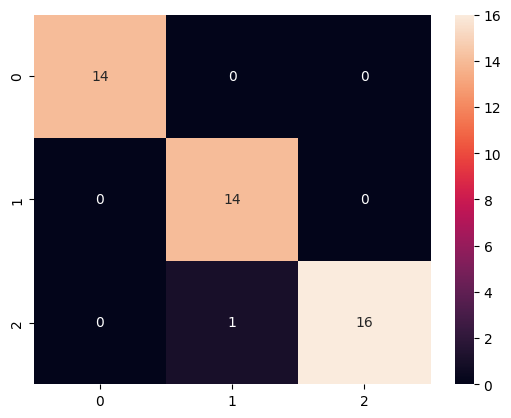

In [ ]:
sns.heatmap(cm2,annot=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model3 = LogisticRegression()

In [ ]:
model3.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predictlr = model3.predict(x_test)

In [ ]:
cm3 = confusion_matrix(y_test,y_predictlr)

In [ ]:
cm3

array([[14,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 17]])

In [ ]:
print(classification_report(y_test, y_predictlr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

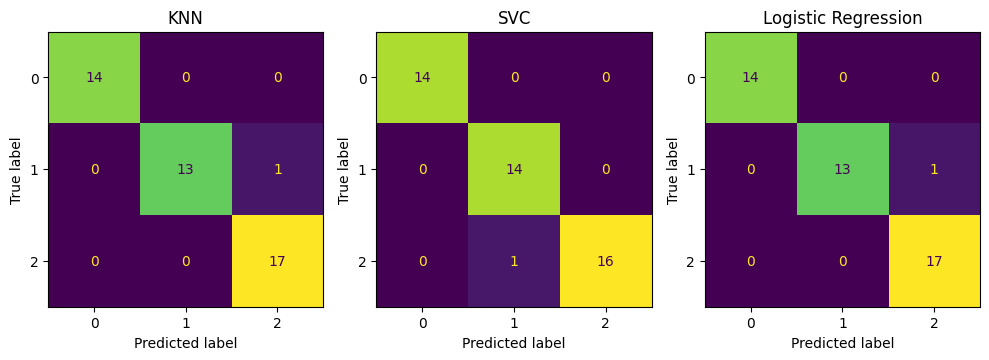

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
titles = ["KNN", "SVC", "Logistic Regression"]
cms = [cm1, cm2, cm3]

for ax, cm, title in zip(axes, cms, titles):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()